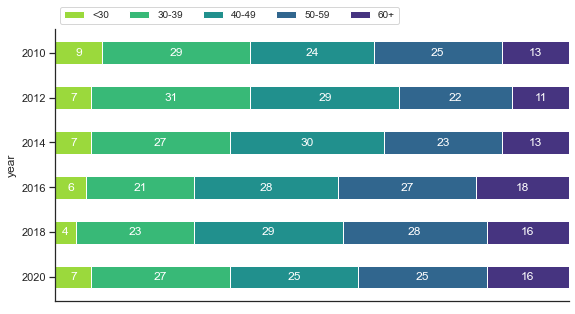

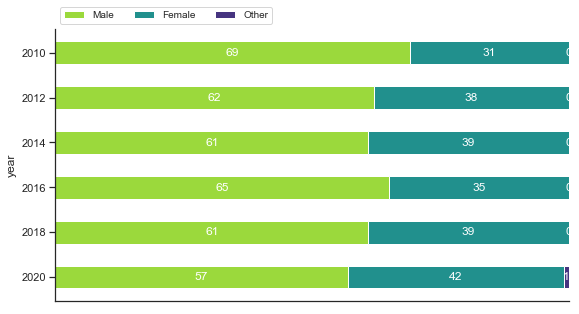

In [116]:
import numpy as np
import matplotlib.pyplot as plt


category_ages = ["<30","30-39","40-49","50-59","60+"]
ages = {
    '2010': [9, 29, 24, 25, 13],
    '2012': [7, 31, 29, 22, 11],
    '2014': [7, 27, 30, 23, 13],
    '2016': [6, 21, 28, 27, 18],
    '2018': [4, 23, 29, 28, 16],
    '2020': [7, 27, 25, 25, 16]
}
category_genders = ["Male","Female","Other"]
genders = {
    '2010': [69, 31, 0],
    '2012': [62, 38, 0],
    '2014': [61, 39, 0],
    '2016': [65, 35, 0],
    '2018': [61, 39, 0],
    '2020': [57, 42, 1]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('viridis_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    sns.despine(fig)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    ax.set(xlabel = "percent")
    ax.set(ylabel = "year")
    
    return fig, ax


survey(ages, category_ages)
plt.savefig("ages.pdf")
survey(genders, category_genders)
plt.savefig("genders.pdf")
plt.show()
